https://stackoverflow.com/questions/40256461/reading-time-series-from-netcdf-with-python

Full notebook here: http://nbviewer.jupyter.org/gist/rsignell-usgs/d55b37c6253f27c53ef0731b610b81b4

# Hokk_Ens_Dec2017_T_SSRD_CC.nc

"t2m" 2-m temperature (Kelvin, C=K-273.15) 

"tcc" Total cloud cover (%)

"ssrd" Surface solar radiation downwards (J/m2)


In [1]:
%matplotlib inline

In [2]:
import numpy as np
import xarray as xr

In [3]:
import datetime as dt
from datetime import datetime, timedelta # 

dayFile = datetime.now() - timedelta(days=1)
dayFile  = dayFile.strftime("%Y%m%d")

# url='https://nomads.ncep.noaa.gov:9090/dods/nam/nam%s/nam1hr_00z' %(dayFile)
# print(url)

In [4]:
# ds = xr.open_dataset(url)
# ds=xr.open_dataset('Hokk_Ens_Dec2017_T_SSRD_CC.nc')
# ds=xr.open_dataset('Hokk_Agg_Ens_2017_2018_T_SSRD_CC.nc')
ds=xr.open_dataset('Hokk_Ens_Aggreg_S1_S2_2017_2018.nc')
ds

<xarray.Dataset>
Dimensions:    (latitude: 1, longitude: 8, number: 10, time: 5840)
Coordinates:
  * longitude  (longitude) float32 141.5 142.0 142.5 143.0 ... 144.0 144.5 145.0
  * latitude   (latitude) float32 43.0
  * number     (number) int32 0 1 2 3 4 5 6 7 8 9
  * time       (time) datetime64[ns] 2017-01-01 ... 2018-12-31T21:00:00
Data variables:
    u10        (time, number, latitude, longitude) float32 ...
    v10        (time, number, latitude, longitude) float32 ...
    t2m        (time, number, latitude, longitude) float32 ...
    asn        (time, number, latitude, longitude) float32 ...
    sd         (time, number, latitude, longitude) float32 ...
    ssrdc      (time, number, latitude, longitude) float32 ...
    ssrd       (time, number, latitude, longitude) float32 ...
    tcc        (time, number, latitude, longitude) float32 ...
    tciw       (time, number, latitude, longitude) float32 ...
    tclw       (time, number, latitude, longitude) float32 ...
    tp         

In [5]:
# Specify desired station time series location
# note we add 360 because of the lon convention in this dataset
#lati = 36.605; loni = -121.85899   # west of Pacific Grove, CA
# lati = 41.4; loni = -100.8  # Georges Bank
lati = 43.25; loni = 142

In [6]:
# extract a dataset closeste to specified point
dsloc = ds.sel(longitude=loni, latitude=lati, method='nearest')
dsloc
# dsloc.ssrd

<xarray.Dataset>
Dimensions:    (number: 10, time: 5840)
Coordinates:
    longitude  float32 142.0
    latitude   float32 43.0
  * number     (number) int32 0 1 2 3 4 5 6 7 8 9
  * time       (time) datetime64[ns] 2017-01-01 ... 2018-12-31T21:00:00
Data variables:
    u10        (time, number) float32 ...
    v10        (time, number) float32 ...
    t2m        (time, number) float32 ...
    asn        (time, number) float32 ...
    sd         (time, number) float32 ...
    ssrdc      (time, number) float32 ...
    ssrd       (time, number) float32 ...
    tcc        (time, number) float32 ...
    tciw       (time, number) float32 ...
    tclw       (time, number) float32 ...
    tp         (time, number) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-03-03 14:37:59 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...

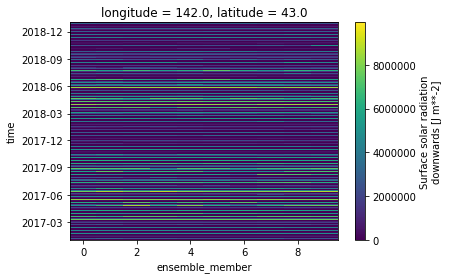

In [7]:
# select a variable to plot
# dsloc['dswrfsfc'].plot()
dsloc['ssrd'].plot()

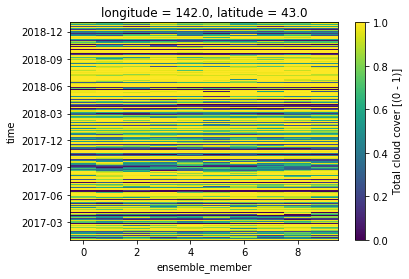

In [8]:
dsloc['tcc'].plot()

In [9]:
# dsloc['tcc']
ss_tc=dsloc[['ssrd', 'tcc']]
ss_tc

<xarray.Dataset>
Dimensions:    (number: 10, time: 5840)
Coordinates:
  * number     (number) int32 0 1 2 3 4 5 6 7 8 9
  * time       (time) datetime64[ns] 2017-01-01 ... 2018-12-31T21:00:00
    latitude   float32 43.0
    longitude  float32 142.0
Data variables:
    ssrd       (time, number) float32 ...
    tcc        (time, number) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-03-03 14:37:59 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...

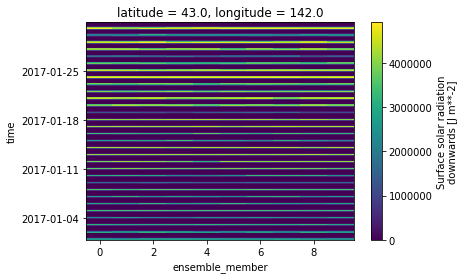

In [10]:
ss_tc_Jan_2017=ss_tc.sel(time='2017-1')
# ss_tc_2017=ds.sel(time='2017')
ss_tc_Jan_2017
p1=ss_tc_Jan_2017['ssrd'].plot()

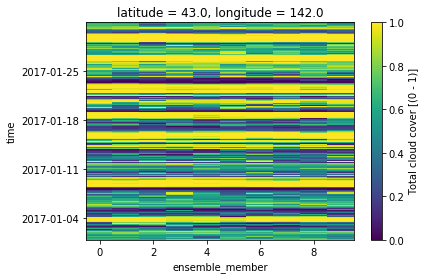

In [11]:
p2=ss_tc_Jan_2017['tcc'].plot()

# Resample with xarray:

https://stackoverflow.com/questions/50506347/operation-along-year-with-xarray

In the below link: Organizing daily Excel data into xarray dataset  (There is a nice 3-D figure represents the N-Data array)

https://stackoverflow.com/questions/41904951/organizing-daily-excel-data-into-xarray-dataset

https://medium.com/pangeo/step-by-step-guide-to-building-a-big-data-portal-e262af1c2977

https://stackoverflow.com/questions/40544846/read-multiple-coordinates-with-xarray

In [19]:
ds=xr.open_dataset('Hokk_Ens_Aggreg_S1_S2_2017_2018.nc')
ds
# ds.sel(time='2017-1-1').max(['latitude', 'longitude'])

<xarray.Dataset>
Dimensions:    (latitude: 1, longitude: 8, number: 10, time: 5840)
Coordinates:
  * longitude  (longitude) float32 141.5 142.0 142.5 143.0 ... 144.0 144.5 145.0
  * latitude   (latitude) float32 43.0
  * number     (number) int32 0 1 2 3 4 5 6 7 8 9
  * time       (time) datetime64[ns] 2017-01-01 ... 2018-12-31T21:00:00
Data variables:
    u10        (time, number, latitude, longitude) float32 ...
    v10        (time, number, latitude, longitude) float32 ...
    t2m        (time, number, latitude, longitude) float32 ...
    asn        (time, number, latitude, longitude) float32 ...
    sd         (time, number, latitude, longitude) float32 ...
    ssrdc      (time, number, latitude, longitude) float32 ...
    ssrd       (time, number, latitude, longitude) float32 ...
    tcc        (time, number, latitude, longitude) float32 ...
    tciw       (time, number, latitude, longitude) float32 ...
    tclw       (time, number, latitude, longitude) float32 ...
    tp         